In [5]:
import numpy as np 
import matplotlib.pyplot as plot
import astropy
import astroquery
from astroquery.vizier import Vizier
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
import astropy.units as u
import pandas as pd 

In [6]:
#Quering the eROSITA data
eROSITA = Vizier.find_catalogs("eRASS1")
for k, v in eROSITA.items():
    print(k, ":", v.description)

J/A+A/682/A34 : SRG/eROSITA all-sky survey catalogs (eRASS1) (Merloni+, 2024)


In [7]:
#Getting the catalogs
eROSITA_cat = Vizier.get_catalogs("J/A+A/682/A34")
#eROSITA_cat[0]
coord_eROSITA = SkyCoord(ra = eROSITA_cat[0]['RA_ICRS'][:10], dec = eROSITA_cat[0]['DE_ICRS'][:10], unit=(u.deg, u.deg))
print(coord_eROSITA)

<SkyCoord (ICRS): (ra, dec) in deg
    [( 7.40524899, -31.03610256), (10.52938433, -28.53184186),
     (12.34295547, -29.51898   ), (13.70410464, -31.20843636),
     (22.29516476, -21.69899756), (20.90908484, -23.18313471),
     (24.37196176, -19.94364313), (28.07929192, -18.54308885),
     (29.33957853, -16.23894003), (30.15509037, -16.81833318)]>


In [10]:
#Cross matching with GAIA 
match = []
width_array = np.arange(5,15,1)
Gaia_sources = []

for j in width_array:
    source_match_gaia = 0
    for i in coord_eROSITA:    
        width = j*u.arcsec
        result = Gaia.cone_search_async(coordinate = i, radius = width).get_results()
        match.append(result)
        source_match_gaia += len(result)
    Gaia_sources.append(source_match_gaia)

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


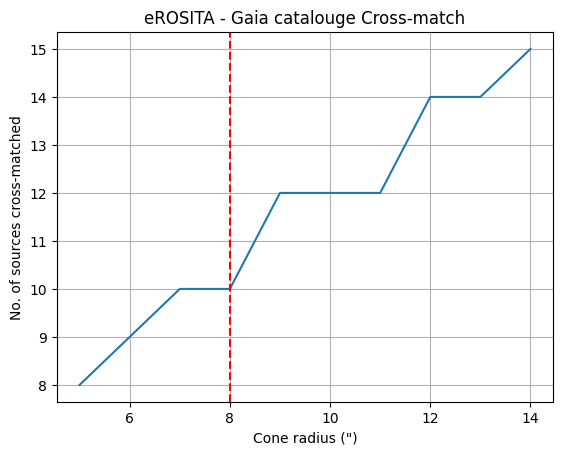

In [35]:
#Plotting
plot.plot(width_array,Gaia_sources)
plot.xlabel("Cone radius (\")")
plot.ylabel("No. of sources cross-matched")
plot.title("eROSITA - Gaia catalouge Cross-match")
plot.axvline(8, linestyle = "--",color = "red")
plot.grid()

In [ ]:
Gaia_sources = []
for i in range(0,len(match)):
    df = match[i].to_pandas()
    df1 = df[['source_id', 'ra', 'dec', 'parallax', 'phot_g_mean_mag', 'bp_rp', 'dist']].to_numpy()
    Gaia_sources.append(df1)
    #df1.to_csv("cross_match.txt", index = False)
    
n_sour_gaia = len(Gaia_sources)
n_sour_gaia

10